In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

#MLPModel
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_cat,
                    validation_split=0.2,
                    epochs=20,
                    batch_size=128,
                    verbose=2)





11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 - 9s - 23ms/step - accuracy: 0.9148 - loss: 0.3012 - val_accuracy: 0.9593 - val_loss: 0.1394
Epoch 2/20
375/375 - 2s - 7ms/step - accuracy: 0.9661 - loss: 0.1143 - val_accuracy: 0.9680 - val_loss: 0.1045
Epoch 3/20
375/375 - 3s - 8ms/step - accuracy: 0.9778 - loss: 0.0740 - val_accuracy: 0.9703 - val_loss: 0.1008
Epoch 4/20
375/375 - 4s - 11ms/step - accuracy: 0.9829 - loss: 0.0552 - val_accuracy: 0.9728 - val_loss: 0.0906
Epoch 5/20
375/375 - 3s - 7ms/step - accuracy: 0.9875 - loss: 0.0394 - val_accuracy: 0.9728 - val_loss: 0.0975
Epoch 6/20
375/375 - 3s - 7ms/step - accuracy: 0.9895 - loss: 0.0321 - val_accuracy: 0.9764 - val_loss: 0.0891
Epoch 7/20
375/375 - 4s - 9ms/step - accuracy: 0.9922 - loss: 0.0252 - val_accuracy: 0.9729 - val_loss: 0.1033
Epoch 8/20
375/375 - 2s - 7ms/step - accuracy: 0.9927 - loss: 0.0224 - val_accuracy: 0.9717 - val_loss: 0.1195
Epoch 9/20
375/375 - 2s - 6ms/step - accuracy: 0.9944 - loss: 0.0159 - val_accuracy: 0.9747 - val_loss: 0.1046

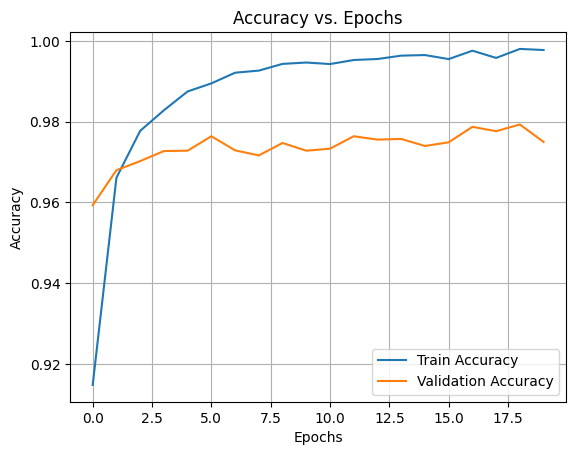

In [ ]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Predictions
y_pred = np.argmax(model.predict(x_test), axis=1)

Test Accuracy: 0.9761
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


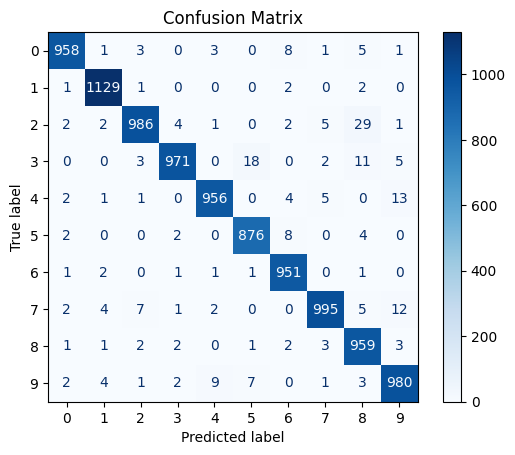

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


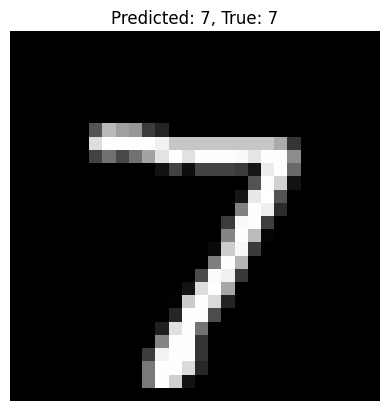

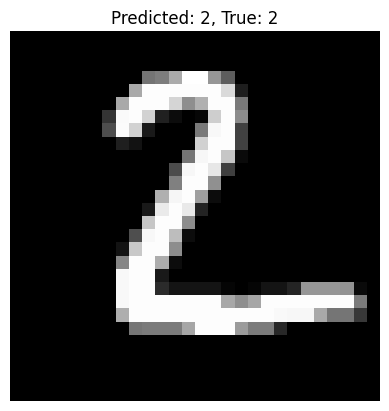

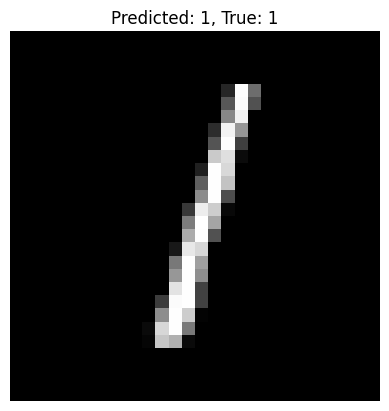

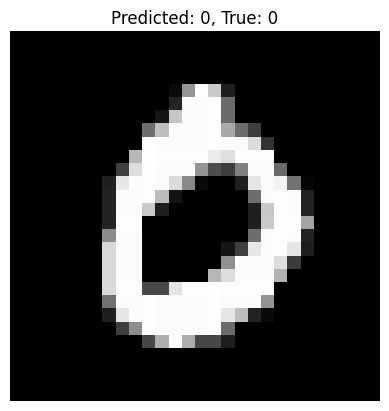

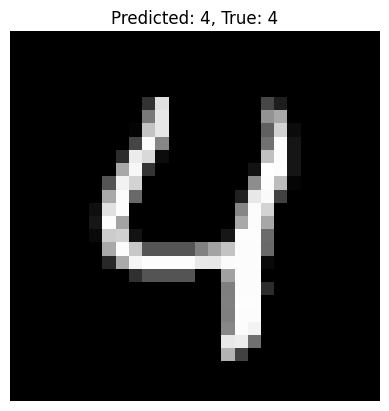

In [ ]:
# Show sample images with predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()
